In [92]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
train = pd.read_csv("train.csv")
buildng_info = pd.read_csv("building_info.csv") #100개 건물 정보

In [94]:
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [95]:
buildng_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [96]:
train.describe(include='all')

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000,204000.000000,204000,204000.000000,43931.000000,203981.000000,203991.000000,128818.000000,116087.000000,204000.000000
unique,204000,NaN,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1_20220601 00,NaN,20220601 00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,50.500000,NaN,25.543524,2.040830,2.134031,78.716295,0.333637,1.063823,2451.036462
std,NaN,28.866141,NaN,3.779523,5.165218,1.358109,15.080108,0.401486,1.001030,2440.648858
min,NaN,1.000000,NaN,10.100000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,NaN,25.750000,NaN,23.400000,0.000000,1.200000,69.000000,0.000000,0.200000,1085.760000
50%,NaN,50.500000,NaN,25.700000,0.100000,2.000000,81.000000,0.100000,0.710000,1766.400000
75%,NaN,75.250000,NaN,28.100000,1.300000,2.800000,91.000000,0.700000,1.780000,2970.000000


In [97]:
train.shape

(204000, 10)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [99]:
buildng_info.shape

(100, 7)

In [100]:
buildng_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [101]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

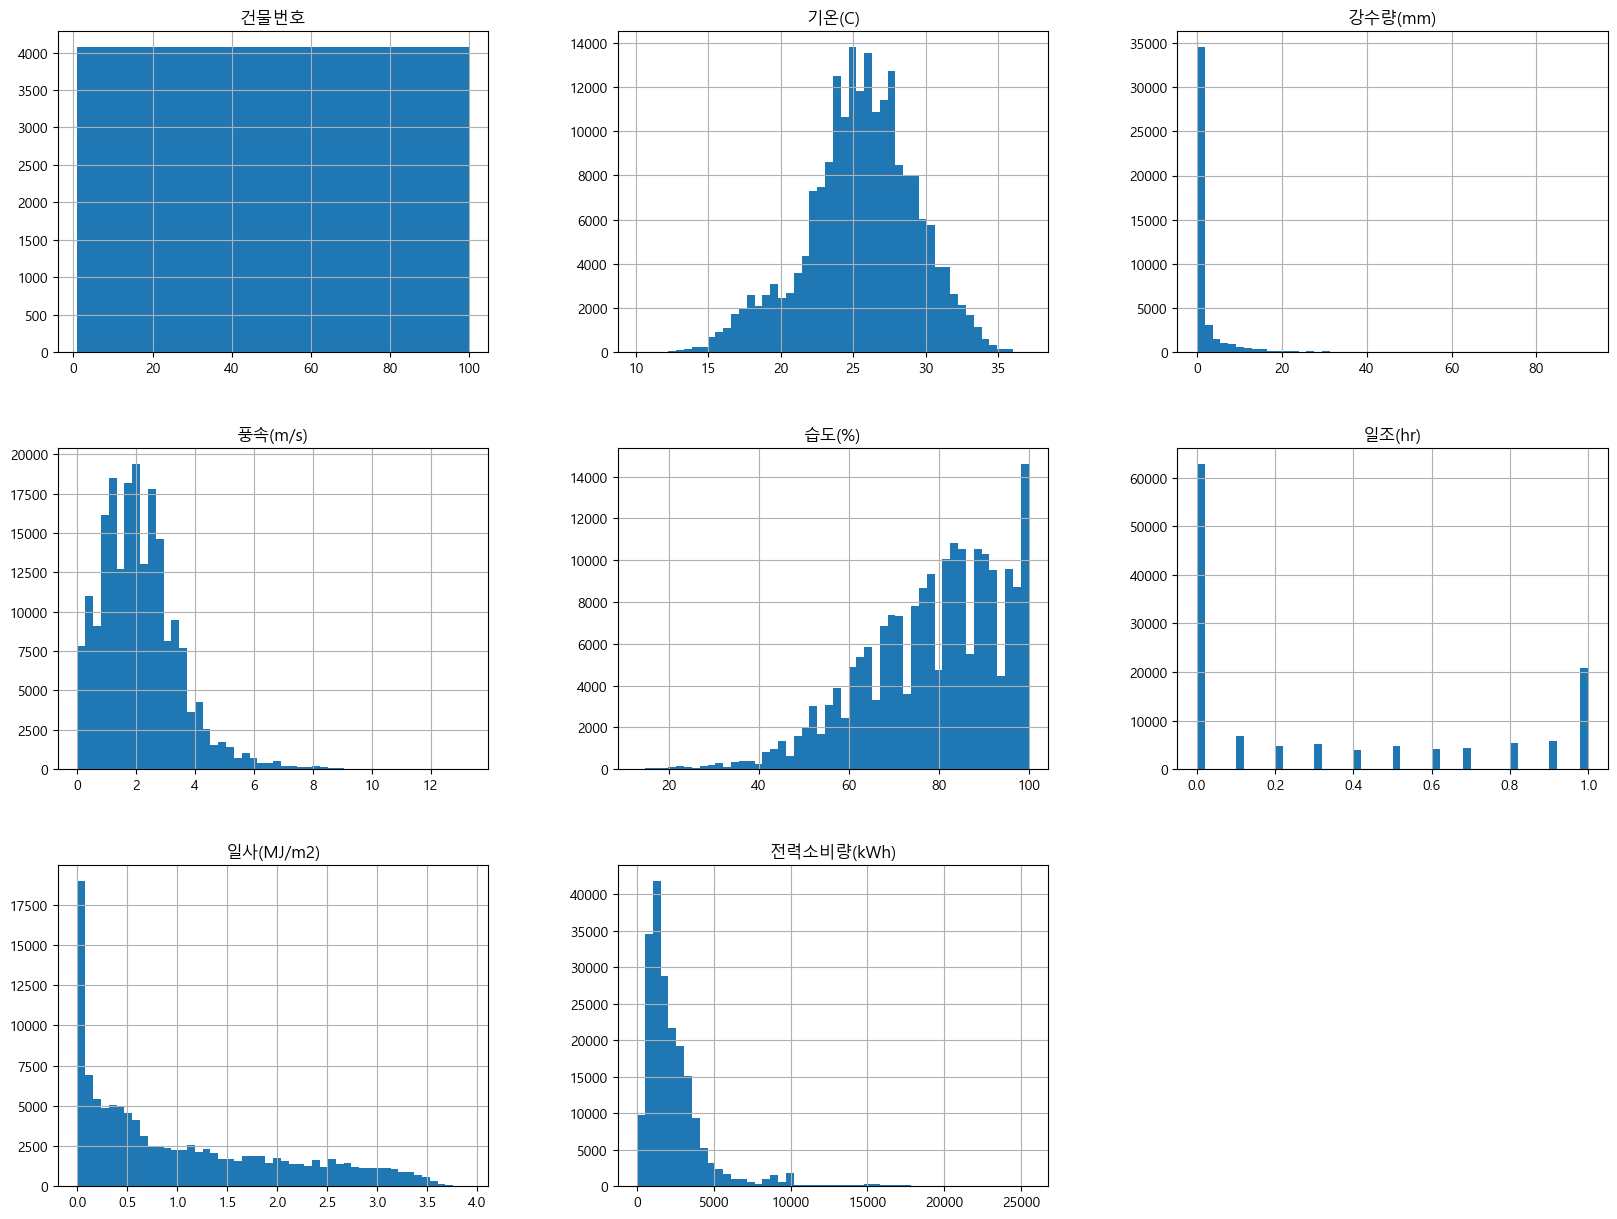

In [102]:
train.hist(bins=50, figsize=(20,15))
plt.show()

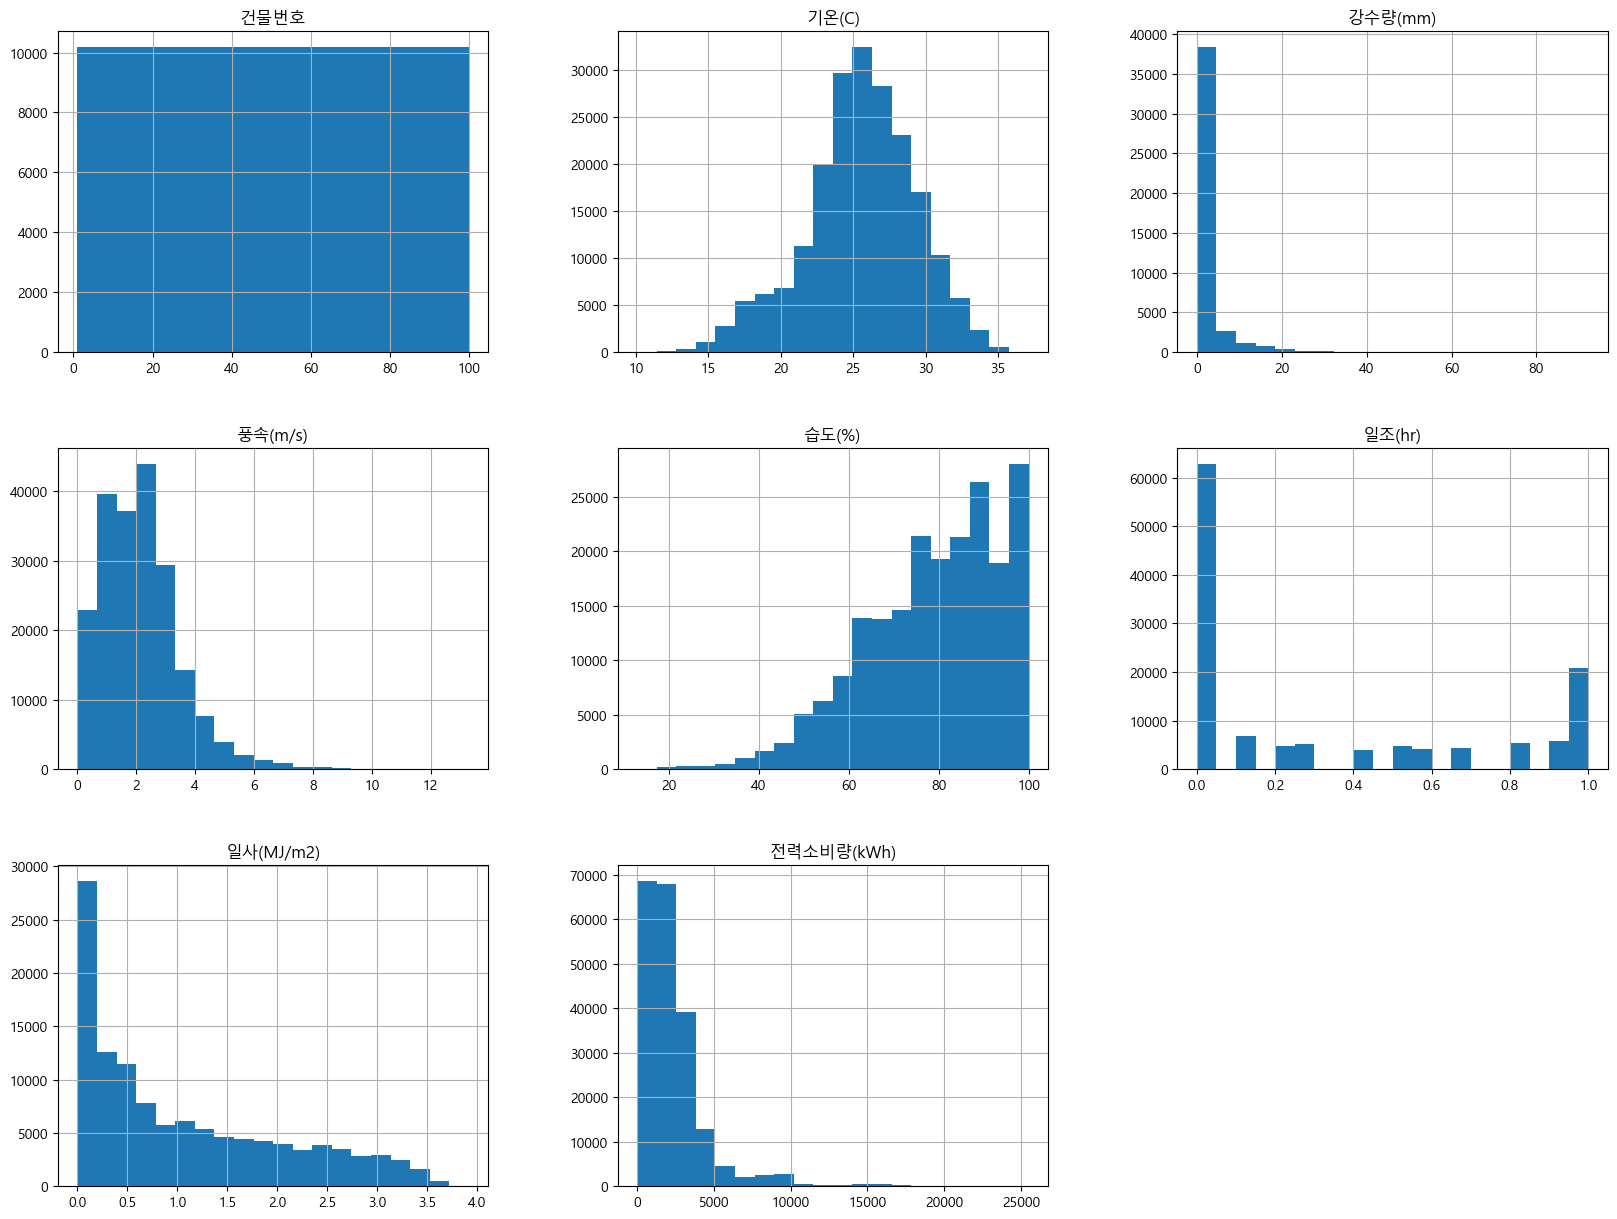

In [103]:
train.hist(bins=20, figsize=(20,15))
plt.show()

In [104]:
! pip install missingno

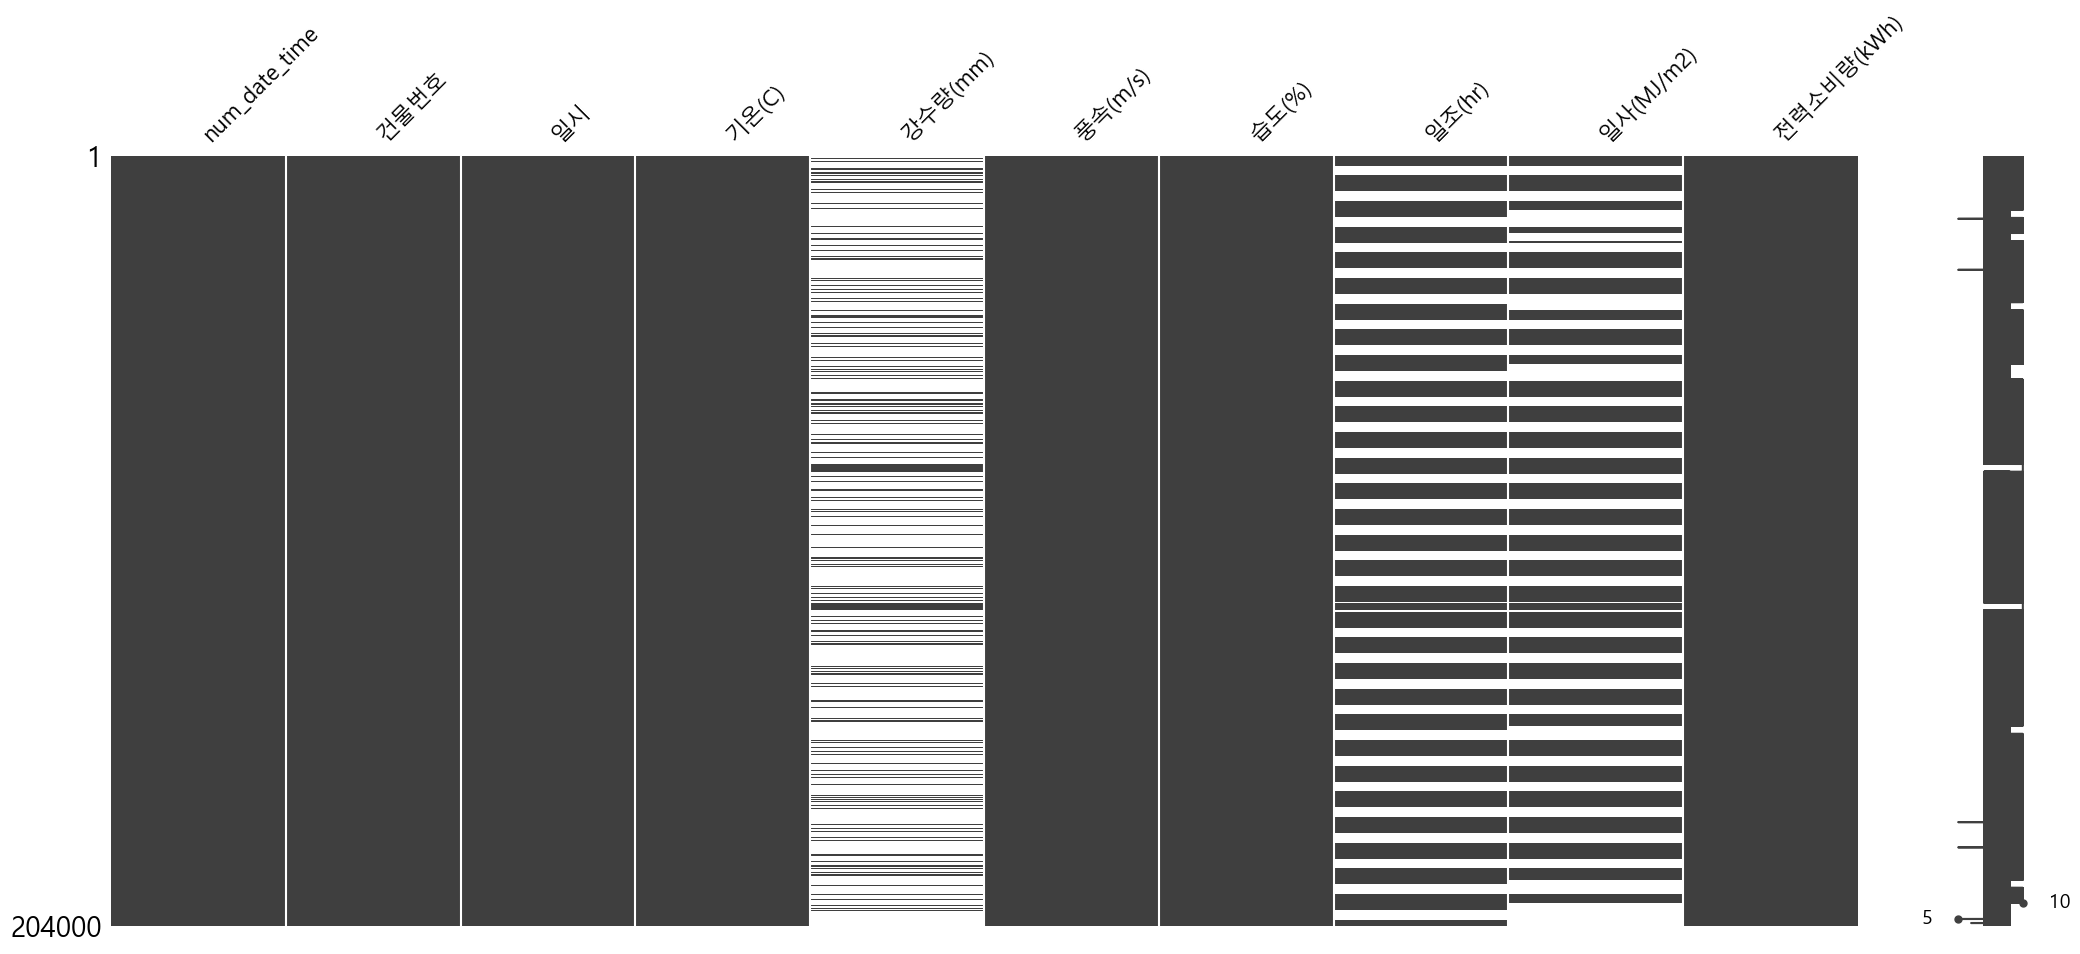

In [105]:
import missingno
missingno.matrix(train)
plt.show()

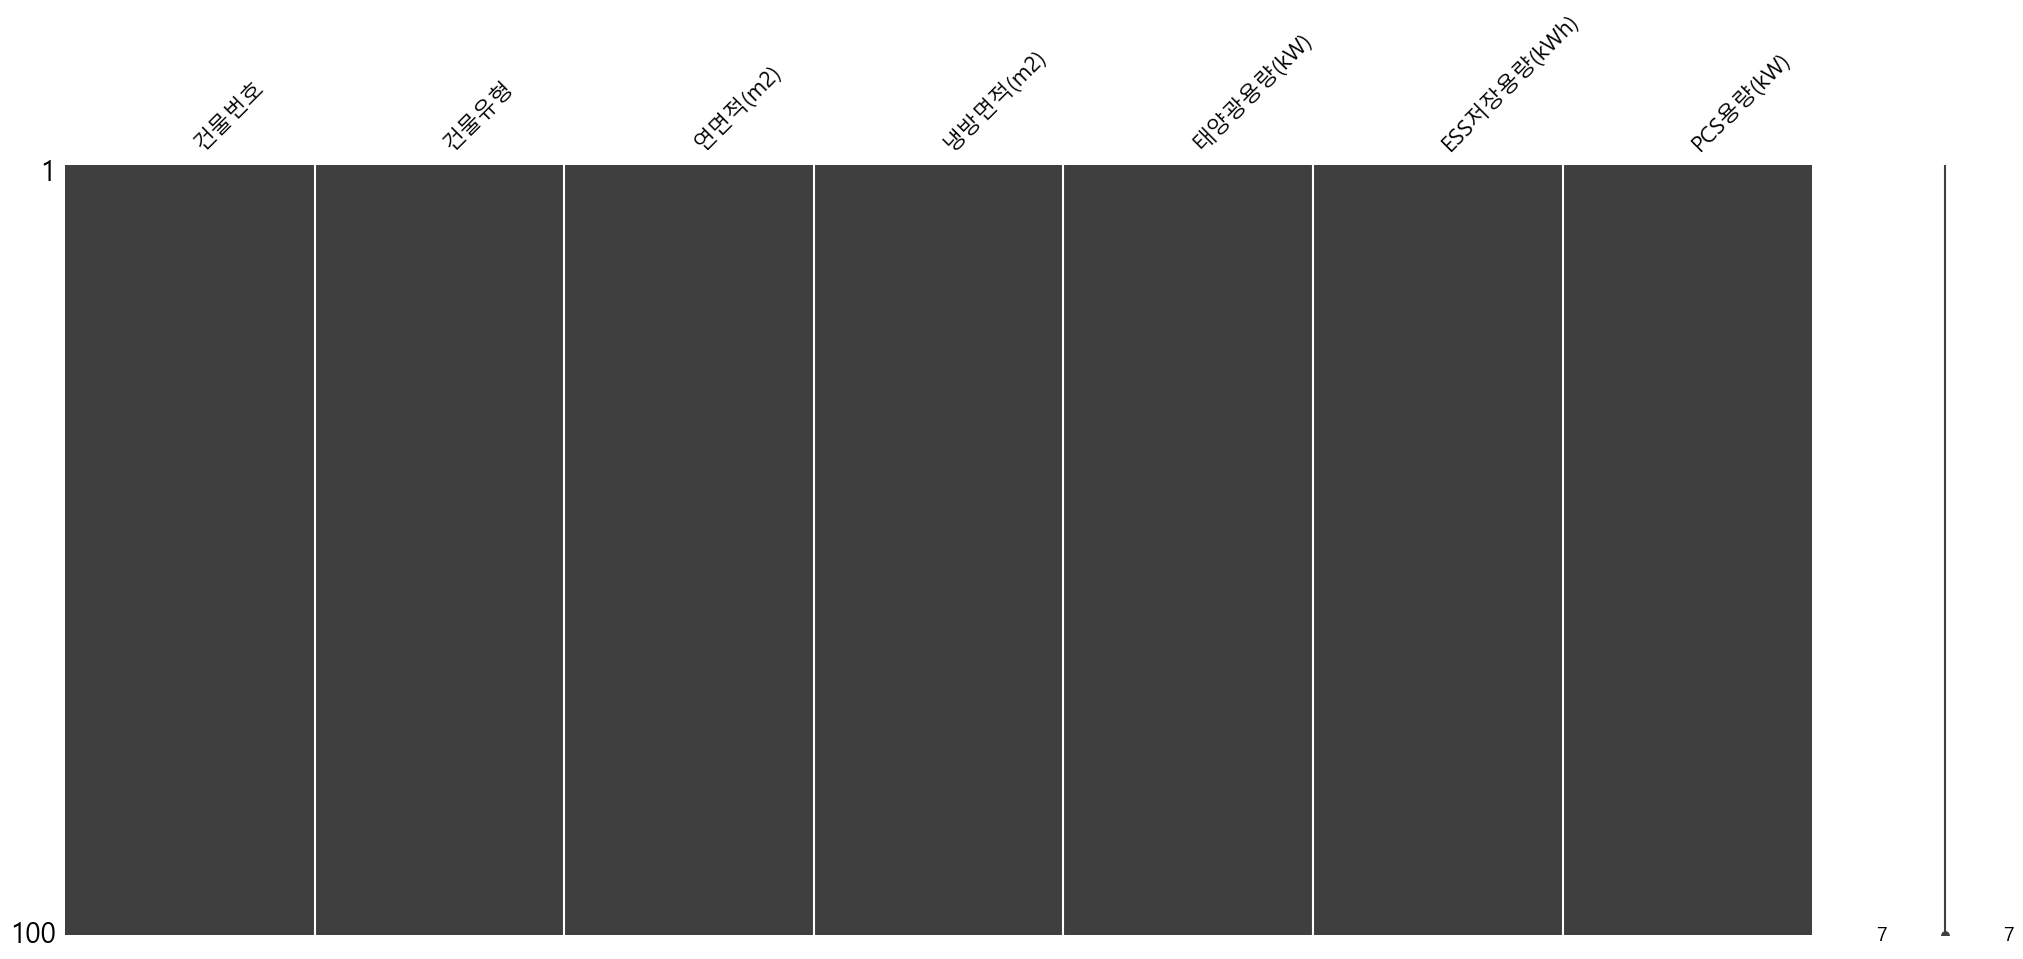

In [106]:
missingno.matrix(buildng_info)
plt.show()

In [107]:
train['건물번호'].value_counts()

건물번호
1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: count, Length: 100, dtype: int64

In [108]:
train['num_date_time'].value_counts()

num_date_time
1_20220601 00      1
67_20220727 08     1
67_20220727 10     1
67_20220727 11     1
67_20220727 12     1
                  ..
34_20220629 10     1
34_20220629 11     1
34_20220629 12     1
34_20220629 13     1
100_20220824 23    1
Name: count, Length: 204000, dtype: int64

In [109]:
train['강수량(mm)'].value_counts()

강수량(mm)
0.0     19101
0.1      2996
0.2      1962
0.3      1431
0.4      1272
        ...  
37.2        1
17.4        1
23.4        1
28.5        1
47.5        1
Name: count, Length: 301, dtype: int64

In [110]:
train['기온(C)'].value_counts()

기온(C)
27.3    2633
25.5    2593
25.4    2539
25.2    2514
26.3    2513
        ... 
10.5       1
10.1       1
11.0       1
10.7       1
10.3       1
Name: count, Length: 263, dtype: int64

In [111]:
train['습도(%)'].value_counts()

습도(%)
99.0     8030
100.0    6558
84.0     5653
89.0     5643
87.0     5525
         ... 
82.1        1
92.3        1
30.9        1
27.9        1
13.0        1
Name: count, Length: 101, dtype: int64

In [112]:
train['일사(MJ/m2)'].value_counts()

일사(MJ/m2)
0.00    6914
0.01    2513
0.02    2058
0.04    1695
0.03    1552
        ... 
3.63       3
3.77       1
3.92       1
3.83       1
3.80       1
Name: count, Length: 379, dtype: int64

In [113]:
train['일시'].value_counts()

일시
20220601 00    100
20220727 11    100
20220728 00    100
20220727 23    100
20220727 22    100
              ... 
20220629 03    100
20220629 02    100
20220629 01    100
20220629 00    100
20220824 23    100
Name: count, Length: 2040, dtype: int64

In [114]:
train['일시'][:25]

0     20220601 00
1     20220601 01
2     20220601 02
3     20220601 03
4     20220601 04
5     20220601 05
6     20220601 06
7     20220601 07
8     20220601 08
9     20220601 09
10    20220601 10
11    20220601 11
12    20220601 12
13    20220601 13
14    20220601 14
15    20220601 15
16    20220601 16
17    20220601 17
18    20220601 18
19    20220601 19
20    20220601 20
21    20220601 21
22    20220601 22
23    20220601 23
24    20220602 00
Name: 일시, dtype: object

In [115]:
train['일조(hr)'].value_counts()

일조(hr)
0.0    62896
1.0    20879
0.1     6810
0.9     5764
0.8     5315
0.3     5134
0.2     4841
0.5     4676
0.7     4311
0.6     4190
0.4     4002
Name: count, dtype: int64

In [116]:
train['전력소비량(kWh)'].value_counts()

전력소비량(kWh)
1008.00    41
1226.88    40
993.60     39
1188.00    38
936.00     36
           ..
277.20      1
267.60      1
810.30      1
831.90      1
676.56      1
Name: count, Length: 51812, dtype: int64

In [117]:
train['풍속(m/s)'].value_counts()

풍속(m/s)
2.2     6890
2.0     6810
1.4     6589
2.4     6423
1.9     6328
        ... 
10.7       5
12.0       5
11.5       5
9.6        5
9.8        3
Name: count, Length: 120, dtype: int64

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


전력 소비량에 영향을 주는 것
1. 에어컨
   * 건물 면적 => 건물 번호
   * 더우면 => 기온
   * 습하면 => 제습, 강수량
   * 풍속 => 추우면 안틈(바람 많이불면 창문 닫음)
   * 태양 강하면 => 일조, 일사
   * 밤보단 낮 => 일시
3. 

In [119]:
buildng_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [120]:
buildng_info['건물번호'].value_counts()

건물번호
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64

In [121]:
buildng_info['ESS저장용량(kWh)'].value_counts()

ESS저장용량(kWh)
-        95
2557      1
800       1
1362      1
837.1     1
3100      1
Name: count, dtype: int64

ESS 있고 없고 => 라벨링\
결측치 채우기 x

In [122]:
buildng_info['PCS용량(kW)'].value_counts()

PCS용량(kW)
-       95
500      2
1000     1
300      1
800      1
Name: count, dtype: int64

PCS 있고 없고 => 라벨링\
결측치 채우기 x

In [123]:
buildng_info[buildng_info['PCS용량(kW)']=='500']

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
18,19,공공,90730.40,90730.00,-,1362,500
20,21,공공,61469.67,43970.64,70,837.1,500


In [124]:
buildng_info[buildng_info['PCS용량(kW)']=='1000']

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
4,5,건물기타,205884.0,150000.0,-,2557,1000


In [125]:
buildng_info[buildng_info['PCS용량(kW)']=='300']

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
6,7,건물기타,101711.52,41341.1,-,800,300


In [126]:
buildng_info[buildng_info['PCS용량(kW)']=='800']

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
70,71,연구소,90896.0,44536.0,65,3100,800


ESS있으면 PCS도 있다.

In [127]:
buildng_info['건물유형'].value_counts()

건물유형
건물기타       15
공공          8
대학교         8
백화점및아울렛     8
병원          8
상용          8
아파트         8
연구소         8
지식산업센터      8
할인마트        8
호텔및리조트      8
데이터센터       5
Name: count, dtype: int64

### [가정]
에어컨 켤 확률 높을 곳(낮은온도로)
* 백화점 및 아울렛
* 상용
* 할인마트
* 호텔 및 리조트
* 데이터센터
  
에어컨 켤 확률 낮을 곳
* 아파트

애매 한곳(절약하면서 켤곳)
* 공공
* 대학교
* 병원
* 연구소
* 지식산업센터

그밖
* 건물기타 

In [128]:
buildng_info['냉방면적(m2)'].value_counts()

냉방면적(m2)
0.00         3
39570.00     1
38452.11     1
142705.00    1
87915.20     1
            ..
119836.00    1
106305.00    1
77202.00     1
130520.00    1
40035.23     1
Name: count, Length: 98, dtype: int64

In [129]:
buildng_info['연면적(m2)'].value_counts()

연면적(m2)
110634.00    1
240551.00    1
253743.00    1
109894.22    1
31503.00     1
            ..
201781.00    1
155785.00    1
199623.00    1
249494.00    1
57497.84     1
Name: count, Length: 100, dtype: int64

In [130]:
buildng_info['태양광용량(kW)'].value_counts()

태양광용량(kW)
-         64
25         2
20         2
50         2
200        2
28.44      1
3          1
9.45       1
365        1
14.4       1
65         1
95         1
60.45      1
621        1
100        1
97.85      1
98.28      1
46.2       1
35         1
100.56     1
40         1
83.72      1
30         1
26.64      1
97.65      1
110        1
70         1
64.8       1
56         1
130.6      1
447.2      1
60         1
21.6       1
Name: count, dtype: int64

태양광 있고 없고 => 인코딩\
결측치 채우기 x

In [131]:
buildng_info[buildng_info['냉방면적(m2)']==0.00]

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
64,65,아파트,183839.000,0.0,-,-,-
65,66,아파트,105073.000,0.0,-,-,-
67,68,아파트,389395.928,0.0,-,-,-


아파트인데 냉방면적이 0.00인 이유?\
1. 에어컨이 없다.
2. 측정을 못했다 => 채워줘야하나?
3. 빼버린다

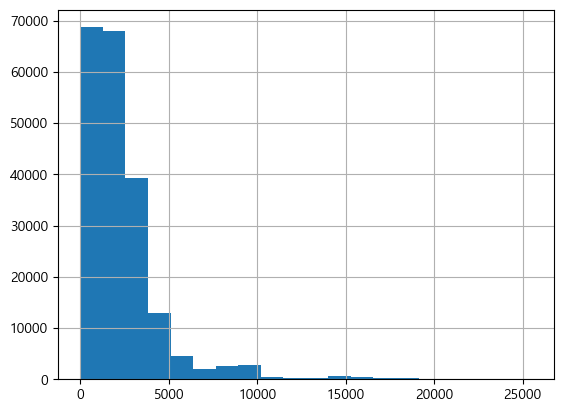

In [132]:
train['전력소비량(kWh)'].hist(bins=20)
plt.show()

In [133]:
train['전력소비량(kWh)'].mean

<bound method Series.mean of 0         1085.28
1         1047.36
2          974.88
3          953.76
4          986.40
           ...   
203995     881.04
203996     798.96
203997     825.12
203998     640.08
203999     540.24
Name: 전력소비량(kWh), Length: 204000, dtype: float64>

In [134]:
train['전력소비량(kWh)'].mean()

2451.036461952613

In [135]:
train['전력소비량(kWh)'].value_counts()

전력소비량(kWh)
1008.00    41
1226.88    40
993.60     39
1188.00    38
936.00     36
           ..
277.20      1
267.60      1
810.30      1
831.90      1
676.56      1
Name: count, Length: 51812, dtype: int64

In [136]:
train[train['전력소비량(kWh)'] > 2451].value_counts()

num_date_time   건물번호  일시           기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  일사(MJ/m2)  전력소비량(kWh)
10_20220605 08  10    20220605 08  18.4   0.2      3.0      89.0   0.0     0.23       2578.56       1
59_20220627 15  59    20220627 15  26.6   0.5      2.6      90.0   0.0     0.48       3217.68       1
59_20220627 17  59    20220627 17  26.3   0.5      5.4      89.0   0.0     0.25       3115.08       1
59_20220627 18  59    20220627 18  26.4   0.0      2.4      87.0   0.0     0.11       2734.92       1
59_20220628 07  59    20220628 07  27.1   0.0      7.2      78.0   0.0     0.12       3146.04       1
                                                                                                   ..
41_20220602 13  41    20220602 13  25.9   0.0      3.3      49.0   1.0     3.29       4953.60       1
41_20220602 14  41    20220602 14  26.3   0.0      3.6      47.0   1.0     3.43       4851.60       1
41_20220602 15  41    20220602 15  26.7   0.0      3.7      47.0   1.0     2.86       4

In [137]:
train['전력소비량(kWh)'].describe(include='all')

count    204000.000000
mean       2451.036462
std        2440.648858
min           0.000000
25%        1085.760000
50%        1766.400000
75%        2970.000000
max       25488.400000
Name: 전력소비량(kWh), dtype: float64

array([[<Axes: title={'center': '건물번호'}>,
        <Axes: title={'center': '기온(C)'}>,
        <Axes: title={'center': '강수량(mm)'}>],
       [<Axes: title={'center': '풍속(m/s)'}>,
        <Axes: title={'center': '습도(%)'}>,
        <Axes: title={'center': '일조(hr)'}>],
       [<Axes: title={'center': '일사(MJ/m2)'}>,
        <Axes: title={'center': '전력소비량(kWh)'}>, <Axes: >]], dtype=object)

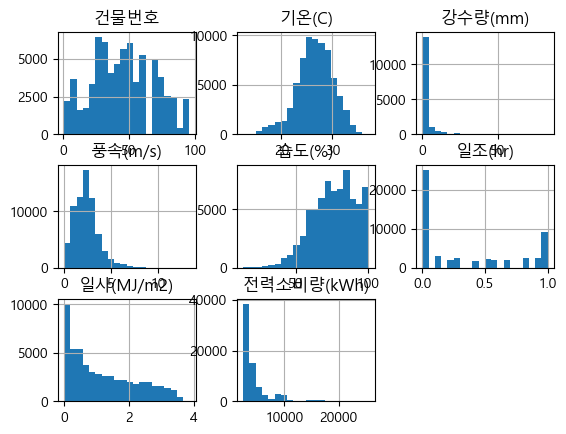

In [138]:
train[train['전력소비량(kWh)'] > 2451].hist(bins=20)

In [140]:
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [142]:
type(train['num_date_time'][0])

str

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [168]:
train_pearson = train.iloc[:, 3:] # 연속형 변수만 추출
#train_pearson = train_pearson.astype({'일시':'string'}) # 타입 변경
train_pearson.info()
#train_pearson.iloc[:, 0] = train_pearson.iloc[:, 0].split(' ', maxsplit=2)
#train_pearson = train_pearson.astype({'일시':' # 타입 변경
train_pearson.corr(method='pearson')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기온(C)       204000 non-null  float64
 1   강수량(mm)     43931 non-null   float64
 2   풍속(m/s)     203981 non-null  float64
 3   습도(%)       203991 non-null  float64
 4   일조(hr)      128818 non-null  float64
 5   일사(MJ/m2)   116087 non-null  float64
 6   전력소비량(kWh)  204000 non-null  float64
dtypes: float64(7)
memory usage: 10.9 MB


,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
기온(C),1.000000,-0.066500,0.220203,-0.389854,0.387001,0.476193,0.171190
강수량(mm),-0.066500,1.000000,0.028729,0.271468,-0.098351,-0.194009,0.015386
풍속(m/s),0.220203,0.028729,1.000000,-0.219095,0.093043,0.136162,0.109954
습도(%),-0.389854,0.271468,-0.219095,1.000000,-0.574123,-0.600839,-0.129546
일조(hr),0.387001,-0.098351,0.093043,-0.574123,1.000000,0.781689,0.021098
일사(MJ/m2),0.476193,-0.194009,0.136162,-0.600839,0.781689,1.000000,0.080357
전력소비량(kWh),0.171190,0.015386,0.109954,-0.129546,0.021098,0.080357,1.000000


C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

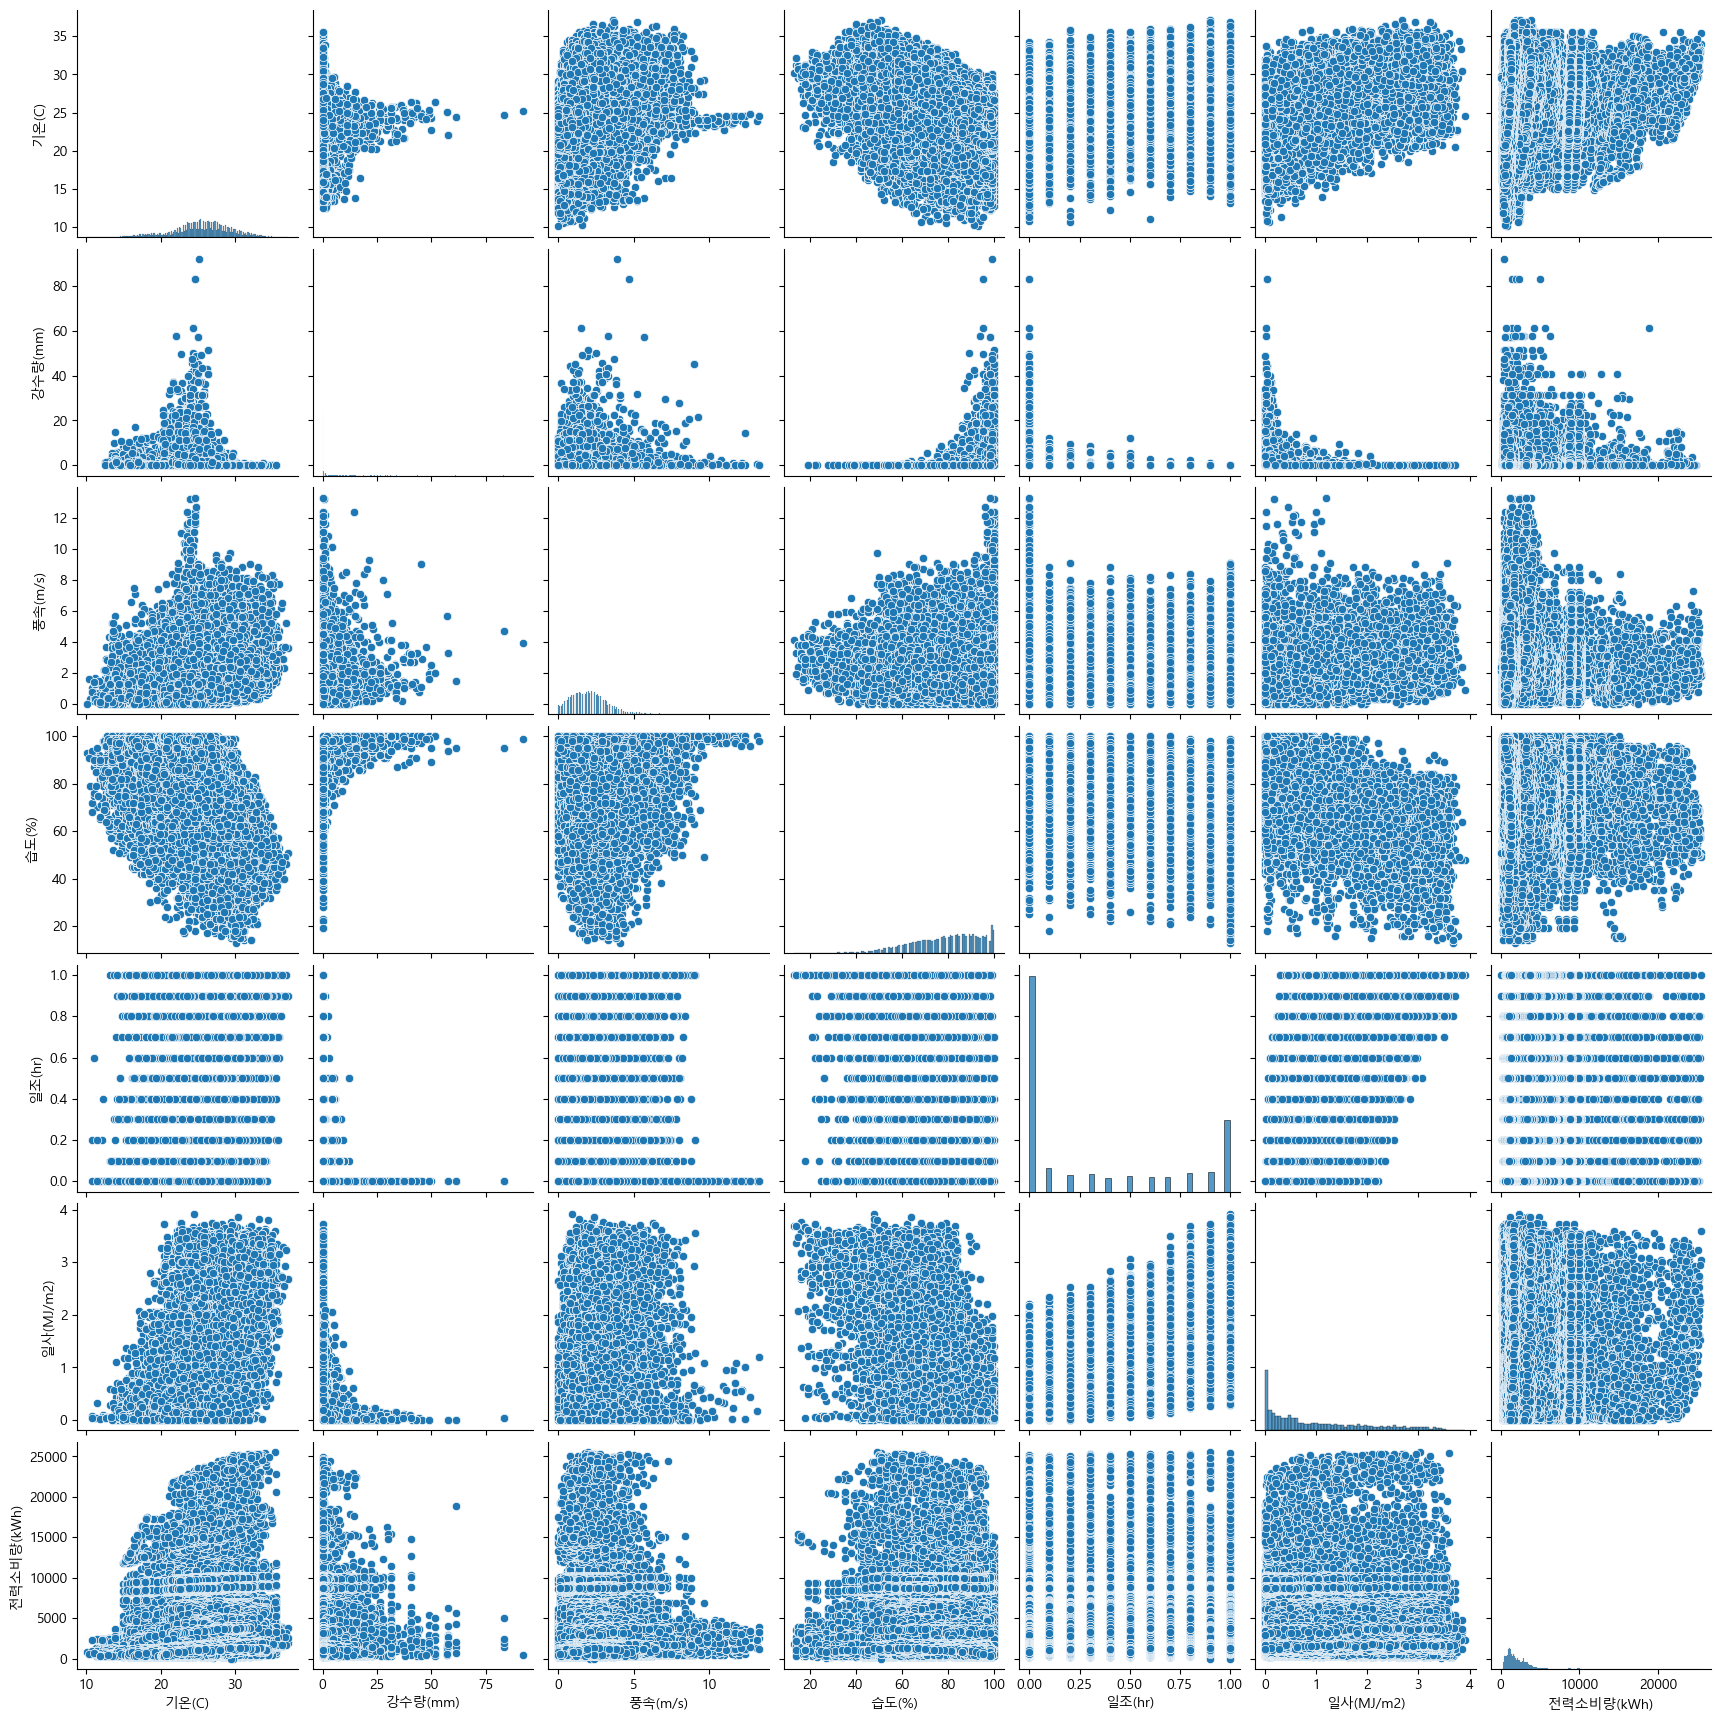

In [169]:
import seaborn as sns
sns.pairplot(train_pearson)

In [195]:
train_pearson.corr(method='spearman')

,기온,강수량,풍속,습도,일조,일사,전력소비량
기온,1.000000,-0.285157,0.270387,-0.438332,0.422911,0.497085,0.275223
강수량,-0.285157,1.000000,-0.046059,0.563096,-0.265555,-0.279446,-0.011883
풍속,0.270387,-0.046059,1.000000,-0.294064,0.136924,0.179597,0.219907
습도,-0.438332,0.563096,-0.294064,1.000000,-0.593925,-0.609372,-0.210253
일조,0.422911,-0.265555,0.136924,-0.593925,1.000000,0.777140,0.071818
일사,0.497085,-0.279446,0.179597,-0.609372,0.777140,1.000000,0.169676
전력소비량,0.275223,-0.011883,0.219907,-0.210253,0.071818,0.169676,1.000000
